<a href="https://colab.research.google.com/github/PabloCaSan/Data-Science-Training/blob/main/Notebook15_Preparacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nota:** Para esta práctica hay que descargar un archivo csv de Kaggle. Se puede encontrar en el siguiente [enlace](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv)  

Conectamos con nuestro Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Navegamos en Drive hasta la carpeta donde está guardada la base de datos

In [ ]:
%cd /content/drive/MyDrive/Platzi/db 
!ls

/content/drive/MyDrive/Platzi/db
API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3605664.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv
API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv
covid_19_data.csv
GlobalLandTemperaturesByCountry.csv
london_merged.csv
Meteorite_Landings.csv
population.csv
test.csv


Importamos las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'1.3.5'

Leemos los datos y guardamos la línea de código en una variable, para no tener que escribir todo a cada rato

In [ ]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


Veamos el tamaño de la tabla

In [ ]:
df_temp.shape

(577462, 4)

Veamos cómo está conformada la tabla

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Para ver qué variables nose repiten, hacemos

In [ ]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

Convertimos los datos de la columna de tiempo a variables tipo tiempo

In [ ]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

Vemos que hay datos desde 1743, así que filtremos para fechas mayores a 1970

In [ ]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


Agrupemos por países y fechas para obtener el promedio de la temperatura por año

In [ ]:
df_t_avg = df_temp.groupby(['Country', #Agrupamos por país...
                 pd.Grouper(key='year', freq = '1Y') #...para cada año
]).agg({'AverageTemperature':[np.mean, np.median]}) #Usamos un diccionario para aplicar las funciones de promedio y de mediana a la columna de AverageTemperature
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

Para ver los datos asociados a un único país, hacemos

In [ ]:
df_t_avg.xs('Mexico')['AverageTemperature']

,mean,median
year,,
1970-12-31,21.036182,21.5130
1971-12-31,20.640333,20.6605
1972-12-31,20.975000,22.1485
1973-12-31,20.496167,20.8200
1974-12-31,20.631500,21.0005
1975-12-31,20.449333,20.9585
1976-12-31,20.145667,20.3740
1977-12-31,20.841250,21.0620
1978-12-31,20.755500,21.2615


Graficamos lo anterior

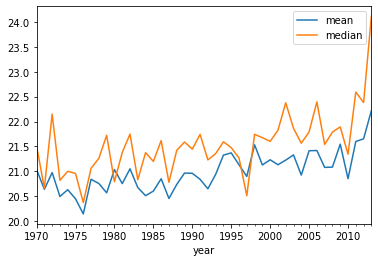

In [ ]:
df_t_avg.xs('Mexico')['AverageTemperature'].plot()

Para ver solo la mediana hacemos

In [ ]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


Extraemos solo el año

In [ ]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

Y renombramos las columnas

In [ ]:
df_t_med.rename(columns={'median':'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


Reorganicemos la tabla para ver los datos por año

In [ ]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,11.1180,28.6180,8.6480,21.9360,6.3550,12.4300,25.6190,27.4460,25.5650,27.9370,27.0110,6.5360,10.6590,26.4620,27.0670,13.1690,21.9350,28.3010,10.0870,23.4400,25.4440,26.7220,11.5200,28.1070,25.7410,19.9750,27.1040,24.4220,-1.6320,24.7480,...,22.6690,1.2720,14.4880,13.7550,27.6430,28.3390,26.4830,-5.8620,19.2560,3.2700,7.4020,19.4770,24.2230,6.4740,22.3660,26.8520,26.8290,27.0600,23.6180,26.4450,20.1740,12.9030,17.4190,26.8910,22.8360,10.0670,28.9860,9.7340,9.9730,8.2860,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,8.6390,28.0850,8.1845,22.2985,7.1385,10.7060,25.4960,25.5135,25.3280,26.3180,26.4790,5.7755,10.0065,25.2630,26.9295,12.6415,21.2455,27.2900,10.1885,23.9550,24.9120,26.2470,9.5820,27.9310,24.7345,19.6260,27.0150,24.0725,-3.4755,23.6530,...,21.9110,1.5420,11.9565,12.6455,27.1535,27.9145,25.8920,-10.5280,19.5295,1.6720,8.5215,17.1220,22.1795,5.8390,22.3920,26.6300,26.4135,26.3805,23.8420,26.0095,19.6470,10.6395,14.9685,26.7755,22.7355,7.4325,27.8175,8.7785,8.9780,8.7545,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,11.4950,28.6780,8.6445,22.3470,5.3755,13.6880,25.8145,26.3535,26.0285,26.9035,27.0225,6.0925,8.7840,25.8145,26.7025,12.5800,21.9525,27.8050,9.7260,23.0225,25.1430,26.6150,10.6495,28.2305,25.4830,20.0425,27.2160,24.1850,-6.6775,23.6670,...,22.3110,0.4455,12.5585,12.2105,27.4820,28.9775,26.1590,-5.9665,19.9670,2.2865,6.1615,19.4300,23.0640,4.9110,22.6910,26.9205,26.2535,27.0445,23.2235,26.4690,18.6385,13.2440,16.3415,27.1115,23.2850,9.0295,28.0485,8.6235,8.7990,8.2290,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,9.7335,28.1630,8.5830,22.9775,4.5905,11.8825,25.5835,27.0690,25.9215,27.1555,26.8725,5.7910,8.0960,26.4840,27.3385,13.5435,22.4190,27.7220,9.3100,23.6135,25.2795,27.0685,10.5565,28.4860,25.4180,20.2410,27.4025,24.6665,-3.6645,24.5360,...,22.4800,1.6770,12.8265,12.3910,27.5945,28.6225,26.4350,-9.6135,18.8930,0.4795,5.1230,18.9260,23.2600,5.5885,22.7820,26.9290,27.0445,26.9310,23.9020,26.4575,19.6385,12.1315,15.8780,26.8120,23.0450,8.5070,28.7285,7.4480,7.5175,8.8785,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,9.3265,27.7935,8.3875,21.6105,5.1555,11.6075,25.2450,26.3585,25.4955,27.2765,26.7885,6.1085,8.3310,25.6020,26.7790,14.0195,21.2395,27.3970,8.3580,22.0050,24.7665,26.1720,10.4035,27.0055,25.5345,19.8995,27.2265,24.0195,-6.0400,23.3540,...,21.8890,1.4885,12.2490,10.8630,27.2295,28.1990,25.8925,-7.0340,19.3190,2.4690,5.4260,19.1350,22.9360,5.6675,22.3410,26.7550,26.4965,26.4465,23.8720,26

Graficamos

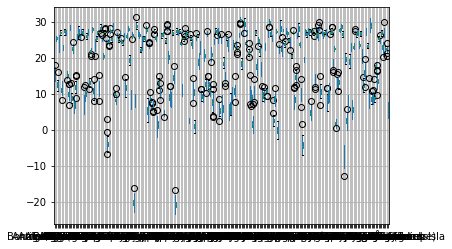

In [ ]:
df_t_pivot.boxplot()

Vemos que son muchísimos datos, así que vamos a reducirlos usando sample, que selecciona renglones aleatorios dentro de la tabla

In [ ]:
df_t_pivot.sample(2)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1975,13.5130,24.8045,12.3595,23.0740,26.651,10.4105,22.4210,26.478,26.334,15.1515,10.2160,28.114,8.8600,21.4200,5.8655,12.2135,25.9255,25.563,25.6860,27.3305,26.456,6.9855,8.4725,25.863,26.7795,14.1455,21.8520,27.4675,10.3755,23.1615,25.1770,26.2985,11.1605,26.9675,25.4380,19.8435,27.0700,24.0085,-4.317,23.781,...,22.126,1.8425,13.6235,12.357,27.2450,27.7055,25.904,-10.178,19.0535,2.369,6.4030,19.0685,23.4175,5.1000,22.5975,26.8635,26.440,26.3395,23.9175,26.1995,19.129,12.6860,15.2960,26.823,22.9845,9.430,27.699,8.1145,8.2045,7.9060,17.1810,13.3395,24.979,24.990,26.2985,20.5175,26.1155,21.8635,21.7910,6.017
1995,14.4835,25.5005,11.8750,23.0965,27.349,12.2240,23.2875,27.854,27.613,15.2710,9.4595,28.721,9.4275,22.0365,8.1380,12.0235,26.2775,26.602,25.8255,27.5590,27.522,7.4550,11.2485,26.158,27.1090,13.5695,22.5115,28.1350,10.9185,24.6210,25.8645,27.5390,10.3955,27.9625,25.2825,20.7005,26.9105,24.2250,-3.457,25.105,...,22.824,1.6955,13.0695,15.011,28.0075,29.0320,26.832,-7.717,20.4860,2.929,8.9155,18.1455,23.1050,4.9775,23.3290,26.9595,26.459,26.9805,23.7415,27.1145,19.187,11.1055,16.1335,27.766,23.5375,8.733,28.384,9.1255,9.2630,9.0025,17.1485,14.0485,25.613,25.227,27.5390,23.6885,26.8915,22.7600,23.4275,4.445


Pero para elegir países en vez de años, usamos la transpuesta

In [ ]:
df_t_pivot.T.sample(2).T

Country,Yemen,Turkmenistan
date,,
1970,27.4390,17.4190
1971,26.5130,14.9685
1972,26.8175,16.3415
1973,27.2265,15.8780
1974,26.6320,14.3705
1975,26.1155,15.2960
1976,26.3220,13.9315
1977,26.8845,15.6115
1978,27.0135,15.6020


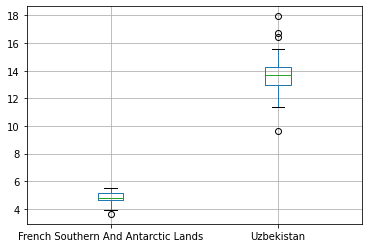

In [ ]:
df_t_pivot.T.sample(2).T.boxplot()

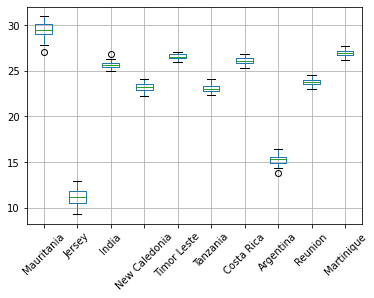

In [ ]:
df_t_pivot.T.sample(10).T.boxplot(rot=45) #Rot sirve para girar las etiquetas del eje x

Complementamos la información con datos del World Bank

In [ ]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv', header = 2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv', header = 2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3605664.csv', header = 2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv', header = 2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv', header = 2)

Ahora seleccionamos los datos entre 1971 y 2015

In [ ]:
range(1971,2015)
map(str,range(1971,2015)) #Para mapear entre tipos de variables
cols = ['Country Name', 'Country Code'] + list(map(str,range(1971,2015))) #Elegimos las columnas que nos interesan
cols[:5] #Mostramos las primeras 5 columnas

['Country Name', 'Country Code', '1971', '1972', '1973']

In [ ]:
df_agri.loc[:,cols] #Elegimos una tabla y mostramos las columnas elegidas anteriormente

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.0,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.0,20.00,20.00,20.00,20.00
1,Africa Eastern and Southern,AFE,5360170.0,5365870.0,5366130.0,5367810.0,5371960.0,5374560.0,5374970.0,5385870.0,5381690.0,5380330.0,5391340.0,5391740.0,5396020.0,5395980.0,5417560.0,5425200.0,5428670.0,5434450.0,5445460.0,5313659.9,5207436.27,5224490.44,5057484.61,5072408.78,5083992.95,5097517.12,5117281.39,5135205.56,5164119.73,5185183.9,5200494.37,5215366.84,5243793.31,5279228.58,5294720.25,5309259.72,5324692.99,5356256.56,5380079.83,5398501.8,6392500.50,6459157.24,6477782.40,6497055.30
2,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,380490.0,380490.0,380530.0,380540.0,380540.0,380540.0,380540.0,380540.0,380450.0,380400.0,380400.0,380400.0,380300.00,380300.00,379340.00,378130.00,377530.00,377520.00,377900.00,378670.00,377530.00,377530.0,377530.00,377530.00,379100.00,379110.00,379100.00,379100.00,379100.00,379100.00,379100.00,379110.0,379100.00,379100.00,379100.00,379100.00
3,Africa Western and Central,AFW,3102665.6,3060380.0,3111330.0,3064870.0,3060690.0,3066700.0,3023890.0,3013030.0,3011030.0,3042130.0,3008140.0,3026200.0,3037840.0,3080760.0,3109950.0,3169070.0,3171470.0,3188410.0,3195000.0,3187523.8,3207365.62,3226179.84,3247322.31,3266364.08,3315053.90,3303797.52,3322659.24,3325963.56,3345190.93,3355358.3,3384939.88,3396241.86,3423124.14,3419379.60,3480862.45,3481821.00,3497969.35,3524364.40,3536365.75,3551895.8,3559485.78,3574436.40,3594810.30,3597067.70
4,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574040.0,455626.37,457180.54,458734.71,460288.88,461843.05,463397.22,464951.39,466505.56,468059.73,469613.9,475164.51,480715.12,486265.73,491816.34,497366.95,502917.56,508468.17,514018.78,519569.39,525120.0,530670.62,536221.24,541771.86,547322.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,234630.0,234630.0,234650.0,234650.0,234650.0,234650.0,234700.0,234700.0,234790.0,234790.0,234810.0,236260.0,236310.00,234810.00,237250.00,237300.00,237360.00,237550.00,237200.00,236800.00,236680.00,236690.0,235950.00,236560.00,234950.00,235570.00,235230.00,236270.00,236270.00,235170.00,234520.00,235790.0,234520.00,235010.00,234990.00,234516.00
263,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,942100.0,941600.0,941000.0,940330.0,940330.0,940330.0,940330.0,944000.0,946500.0,949000.0,953000.0,956000.0,960050.00,964730.00,969360.00,972650.00,975200.00,978900.00,979450.00,979880.00,980580.00,981250.0,980130.00,980280.00,979280.00,976080.00,974830.00,968880.00,968900.00,971080.00,969880.00,968910.0,963740.00,963410.00,963410.00,963410.00
264,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,197800.0,198460.0,198360.0,198080.0,199610.0,199820.0,201250.0,202250.0,203660.0,205290.0,208970.0,208110.0,208260.00,210650.00,212020.00,214730.00,214580.00,218650.00,219710.00,220250.00,224050.00,224980.0,225550.00,226160.00,229090.00,228970.00,227620.00,230480.00,229840.00,230870.00,23586

Ahora unimos la tabla con las columnas que nos interesan

In [ ]:
df_agri.loc[:,cols].melt(id_vars=['Country Name', 'Country Code'])

,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


Ahora los años que antes eran una columna forman parte de una solo columna

Renombremos las columnas

In [ ]:
df_agri.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'Agriculture'}
)

,Country,name,date,Agriculture
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


Hay que hacer lo anterior para cada tabla, entonces mejor creamos una función

In [ ]:
def fun_formato(df, col='Agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':col})

In [ ]:
df_agri = fun_formato(df_agri, col='Agriculture')
df_fore = fun_formato(df_fore, col='forest')
df_elec = fun_formato(df_elec, col='electricProd')
df_co2e = fun_formato(df_co2e, col='co2')
df_popu = fun_formato(df_popu, col='population')

In [ ]:
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59442.0
1,Africa Eastern and Southern,AFE,1971,175100167.0
2,Afghanistan,AFG,1971,11475450.0
3,Africa Western and Central,AFW,1971,123184308.0
4,Angola,AGO,1971,6041239.0
...,...,...,...,...
11699,Kosovo,XKX,2014,1812771.0
11700,"Yemen, Rep.",YEM,2014,25823488.0
11701,South Africa,ZAF,2014,54544184.0
11702,Zambia,ZMB,2014,15399793.0


In [ ]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


Juntamos la tabla de la población con la de la temperatura, pero antes convertimos las variables de la fecha en variables tipo numérico

In [ ]:
df_popu['date'] = df_popu['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)

In [ ]:
df_merge = pd.merge(df_t_med[['Country',	'temperature',	'date']],
                    df_popu, on=['Country','date'], how='inner')
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475450.0
1,Afghanistan,13.8725,1972,AFG,11791222.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412960.0
4,Afghanistan,13.5130,1975,AFG,12689164.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0


In [ ]:
df_merge = pd.merge(df_merge,
                    df_co2e,
                    on=['Country','name','date'],
                    how='inner')
df_merge = pd.merge(df_merge,
                    df_elec,
                    on=['Country','name','date'],
                    how='inner')
df_merge = pd.merge(df_merge,
                    df_agri,
                    on=['Country','name','date'],
                    how='inner')
df_merge = pd.merge(df_merge,
                    df_fore,
                    on=['Country','name','date'],
                    how='inner')

In [ ]:
df_merge

,Country,temperature,date,name,population,co2,electricProd,Agriculture,forest
0,Afghanistan,14.9340,1971,AFG,11475450.0,1895.839,NaN,380360.0,NaN
1,Afghanistan,13.8725,1972,AFG,11791222.0,1532.806,NaN,380460.0,NaN
2,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,380480.0,NaN
3,Afghanistan,13.6160,1974,AFG,12412960.0,1917.841,NaN,380480.0,NaN
4,Afghanistan,13.5130,1975,AFG,12689164.0,2126.860,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0,7750.000,585.457099,163000.0,179513.5
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0,9810.000,606.643960,162000.0,179052.8
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0,11490.000,636.248991,164000.0,178592.1
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0,12110.000,608.761669,162000.0,178131.4


Vemos que hay datos NaN, los quitaremos

In [ ]:
df_merge.dropna()

,Country,temperature,date,name,population,co2,electricProd,Agriculture,forest
62,Albania,13.4490,1990,ALB,3286542.0,6050.0,552.252185,11210.0,7888.0
63,Albania,11.5885,1991,ALB,3266790.0,4110.0,418.453589,11270.0,7868.5
64,Albania,13.5850,1992,ALB,3247039.0,2240.0,453.644074,11270.0,7849.0
65,Albania,13.6500,1993,ALB,3227287.0,2070.0,536.363825,11260.0,7829.5
66,Albania,13.2390,1994,ALB,3207536.0,2140.0,596.407959,11260.0,7810.0
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0,7750.0,585.457099,163000.0,179513.5
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0,9810.0,606.643960,162000.0,179052.8
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0,11490.0,636.248991,164000.0,178592.1
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0,12110.0,608.761669,162000.0,178131.4


Guardamos lo anterior en una variable

In [ ]:
df_climate = df_merge.dropna()

Y ahora ordenamos a los países de acuerdo a su producción de CO2

In [ ]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America    5.979791e+06
United States    5.470430e+06
China            3.667540e+06
Japan            1.173390e+06
India            9.707050e+05
                     ...     
Suriname         1.500000e+03
Mozambique       1.500000e+03
Togo             1.430000e+03
Niger            8.050000e+02
Eritrea          6.400000e+02
Name: co2, Length: 120, dtype: float64

Quitamos la notación científica

In [ ]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [ ]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,979,791.3
United States   5,470,430.0
China           3,667,540.0
Japan           1,173,390.0
India             970,705.0
                    ...    
Suriname            1,500.0
Mozambique          1,500.0
Togo                1,430.0
Niger                 805.0
Eritrea               640.0
Name: co2, Length: 120, dtype: float64

Grafiquemos los datos de los 10 primeros países de la lista anterior

In [ ]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [ ]:
df_max_co2 = df_climate[df_climate['Country'].isin(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,date,name,population,co2,electricProd,Agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","419,120.0","16,167.4","614,030.0","3,482,729.3"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","412,930.0","16,181.6","615,332.5","3,482,258.3"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","426,000.0","16,164.4","614,650.0","3,481,787.4"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","422,680.0","16,320.1","613,970.0","3,481,316.4"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","438,820.0","16,388.3","613,290.0","3,480,845.5"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,159,550.0","12,913.7","4,089,470.0","3,082,016.0"
7005,United States,10.2,2010,USA,"309,327,143.0","5,392,870.0","13,394.9","4,069,917.0","3,087,200.0"
7006,United States,9.5,2011,USA,"311,583,481.0","5,172,100.0","13,245.9","4,050,364.0","3,089,950.0"
7007,United States,9.9,2012,USA,"313,877,662.0","4,950,210.0","12,964.2","4,030,810.5","3,092,700.0"


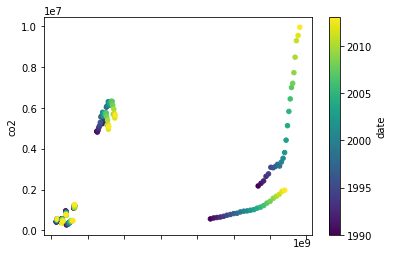

In [ ]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis'
)

Veamos la correlación entre variables

In [ ]:
df_climate.corr()

,temperature,date,population,co2,electricProd,Agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.1,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricProd,-0.4,0.1,-0.1,0.2,1.0,0.1,0.2
Agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


Para observar mejor lo que pasa, graficamos usando un mapa de calor

In [ ]:
import seaborn as sns

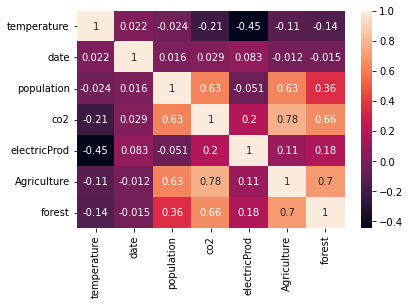

In [ ]:
sns.heatmap(df_climate.corr(), annot=True) #annot sirve para mostrar los valores

Vemos que las variables más correlacionadas son la producción de CO2 con la población, la agricultura con la población, la producción de CO2 con la agricultura y la deforestación con la agricultura

Curiosamente, no se ve una correlación entre la temperatura y la fecha. Esto seguramente se debe a que estamos considerando a muchos países, y las temperaturas son diferentes para cada uno de ellos

Analicemos los datos como un solo planeta, es decir, sin hacer distinciones entre países

In [ ]:
df_med = df_climate.groupby('date').median()
df_med

,temperature,population,co2,electricProd,Agriculture,forest
date,,,,,,
1990,22.7,"10,230,931.0","29,250.0","1,157.4","91,700.0","63,710.0"
1991,22.4,"10,346,663.5","27,345.0","1,072.5","91,870.0","63,349.1"
1992,19.9,"9,748,274.5","24,085.0","1,451.8","89,700.0","46,809.8"
1993,20.6,"9,877,647.0","24,080.0","1,520.3","83,965.0","45,837.1"
1994,20.5,"10,014,523.5","25,515.0","1,582.7","85,220.0","45,468.5"
1995,20.0,"10,081,493.5","27,300.0","1,606.4","77,575.0","44,901.8"
1996,19.9,"10,110,291.0","28,315.0","1,707.6","78,345.0","44,265.8"
1997,20.2,"10,113,205.0","28,945.0","1,782.6","79,280.0","43,629.8"
1998,21.2,"10,116,079.5","28,965.0","1,807.8","80,410.0","42,993.8"


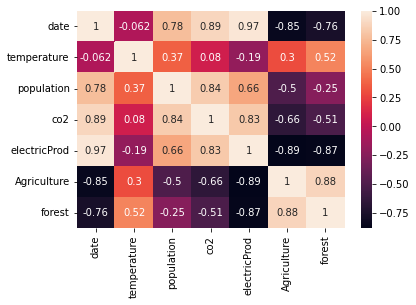

In [ ]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

Esta vez se observa que la producción de CO2 está muy relacionada con la fecha, la producción eléctrica con la fecha, el crecimiento de la población y la fecha, el crecimiento de la población y la producción de CO2, la producción de CO2 y la producción eléctrica, la forestación y la fecha (correlación inversa), la agricultura y la fecha (correlación inversa), la agricultura y la forestación

Hagamos un diagrama de dispersión

In [ ]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7e6ee99d0>,
      dtype=object)

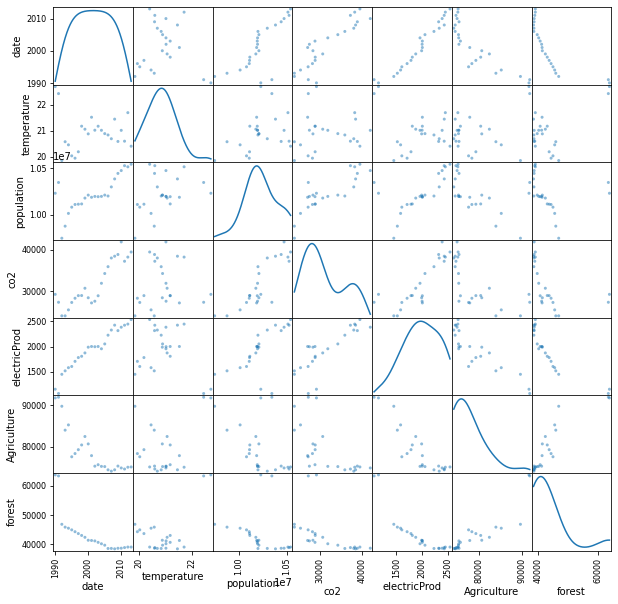

In [ ]:
scatter_matrix(df_med.reset_index(),diagonal='kde', figsize=(10,10))

Ahora veamos gráficos de coordenadas paralelas

In [ ]:
from pandas.plotting import parallel_coordinates

Reducimos el tamaño de la tabla, para usarla solo con países de latinoamérica

In [ ]:
df_lamerica = df_climate[
  df_climate['Country'].isin(['Colombia',
    'Argentina',
    'Mexico',
    'Bolivia',
    'Peru',
    'Chile'])
][['Country',
   'temperature',
   'co2',
   'Agriculture',
   'forest']]

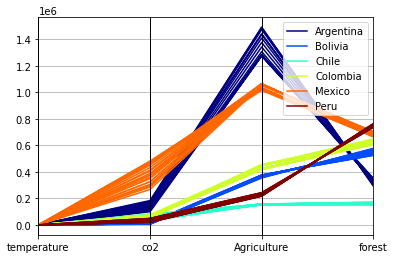

In [ ]:
parallel_coordinates(df_lamerica, 'Country', colormap='jet') #colormap sirve para cambiar el esquema de colores

Se observa que Argentina tiene una mayor agricultura, México tiene mayor producción de CO2 y Perú tiene mayor forestación